<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Merge-rows-with-same-book_id-and-movie_id." data-toc-modified-id="Merge-rows-with-same-book_id-and-movie_id.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Merge rows with same <code>book_id</code> and <code>movie_id</code>.</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span></li></ul></div>

In [6]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

In [63]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format ='retina'

In [206]:
books = pd.read_csv('data/books.csv')
movies = pd.read_csv('data/movies.csv')

In [207]:
books.head()

,book_id,author,book_title,book_wiki_url,count,adaptations,isbn,oclc,valid_identifier,metadata_updated,number_of_pages,subject_places,subjects,publish_date,publish_places,goodreads,gc_title,gc_language_code,gc_average_rating,gc_format,gc_ratings_count,gc_text_reviews_count,title,gc_authors
0,b_9780385007511_848489,Stephen King,'Salem's Lot,https://en.wikipedia.org/wiki/%27Salem%27s_Lot,0,[],9780385007511,848489,True,True,427.0,"['Maine', 'U.S.A.', ""Jerusalem's Lot"", 'Marste...","['Catholic Church', 'arson', 'Great Depression...",1976,['New York'],1589604.0,Salem's Lot,en-US,4.01,Hardcover,443.0,65.0,'salem's Lot,NaN
1,b_0684819066_38377745,NaN,A Beautiful Mind_(book),https://en.wikipedia.org/wiki/A Beautiful Mind...,1,['A Beautiful Mind'],0684819066,38377745,True,True,459.0,['United States'],"['Mathematicians', 'Biography']",1998,['New York'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,A beautiful mind,NaN
2,b_0434098000_4205836,Anthony Burgess,A Clockwork Orange (novel),https://en.wikipedia.org/wiki/A_Clockwork_Oran...,0,[],0434098000,4205836,True,True,195.0,"['England', 'Korova Milk Bar']","['Internet Archive Wishlist', 'bible', 'aversi...",1962,['London'],101194.0,A Clockwork Orange,eng,3.99,Hardcover,142.0,17.0,A clockwork orange,NaN
3,b_0434098000_4205836,Anthony Burgess,A Clockwork Orange_(novel),https://en.wikipedia.org/wiki/A Clockwork Oran...,1,['A Clockwork Orange'],0434098000,4205836,True,True,195.0,"['England', 'Korova Milk Bar']","['Internet Archive Wishlist', 'bible', 'aversi...",1962,['London'],101194.0,A Clockwork Orange,eng,3.99,Hardcover,142.0,17.0,A clockwork orange,NaN
4,b_0064433390_30559641,William Joyce,A Day with Wilbur Robinson,https://en.wikipedia.org/wiki/A_Day_with_Wilbu...,0,[],0064433390,30559641,True,True,32.0,NaN,"['In library', 'Humorous stories']","September 30, 1993",NaN,566625.0,A Day with Wilbur Robinson,NaN,4.03,Paperback,647.0,81.0,A Day with Wilbur Robinson,NaN


In [208]:
movies.head()

,movie_id,movie_title,book_title,imdb_no,usable,isbn,oclc,imdb_title,imdb_actors,imdb_writers,imdb_genres,imdb_year,imdb_rated,imdb_released,imdb_runtime,imdb_imdbrating,imdb_imdbvotes,metadata_updated,book_id,budget,gross_usa,cumulative_worldwide_gross,opening_weekend_usa
0,m_9780385007511_848489_tt0355987,'Salem's Lot (2004 TV miniseries),'Salem's Lot,tt0355987,True,9.780385e+12,848489,Salem's Lot,"['rob lowe', 'andre braugher', 'donald sutherl...",['n/a'],"['drama', 'horror', 'mystery', 'thriller']",2004,TV-14,20 Jun 2004,181 min,6.2,"9,045",True,b_9780385007511_848489,25000000.0,NaN,NaN,NaN
1,m__470015866_tt0048918,1984 (1956 film),Nineteen Eighty-Four,tt0048918,True,NaN,470015866,1984,"[""edmond o'brien"", 'michael redgrave', 'jan st...","['george orwell', 'william templeton', 'ralph ...","['drama', 'sci-fi']",1956,Not Rated,01 Sep 1956,90 min,7.0,"2,779",True,b__470015866,NaN,NaN,NaN,NaN
2,m_0060250488__tt0202179,ABC Afterschool Special,Freaky Friday,tt0202179,True,6.025049e+07,NaN,ABC Afterschool Specials,"['lance kerwin', 'samaria graham', 'mara hobel...",['guy fraumeni'],"['adventure', 'comedy', 'drama']",1972–1997,NaN,04 Oct 1972,60 min,6.9,611,True,b_0060250488_,NaN,NaN,NaN,NaN
3,m_0434098000_4205836_tt0066921,A Clockwork Orange (film),A Clockwork Orange (novel),tt0066921,True,4.340980e+08,4205836,A Clockwork Orange,"['malcolm mcdowell', 'patrick magee', 'michael...","['stanley kubrick', 'anthony burgess']","['crime', 'drama', 'sci-fi']",1971,R,02 Feb 1972,136 min,8.3,"691,997",True,b_0434098000_4205836,2200000.0,26589355.0,NaN,NaN
4,m_0486440885__tt0061270,A Journey to the Center of the Earth (1993),Voyage au centre de la Terre,tt0061270,True,4.864409e+08,NaN,Journey to the Center of the Earth,"['ted knight', 'pat harrington jr.', 'jane webb']",['n/a'],"['animation', 'family', 'fantasy']",1967–1969,NaN,09 Sep 1967,30 min,7.8,67,True,b_0486440885_,NaN,NaN,NaN,NaN


## Data cleaning

In [209]:
books = books.applymap(lambda c:c.lower().strip() if type(c) == str else c)
movies = movies.applymap(lambda c:c.lower().strip() if type(c) == str else c)

In [210]:
books.shape
movies.shape

(769, 24)

(660, 23)

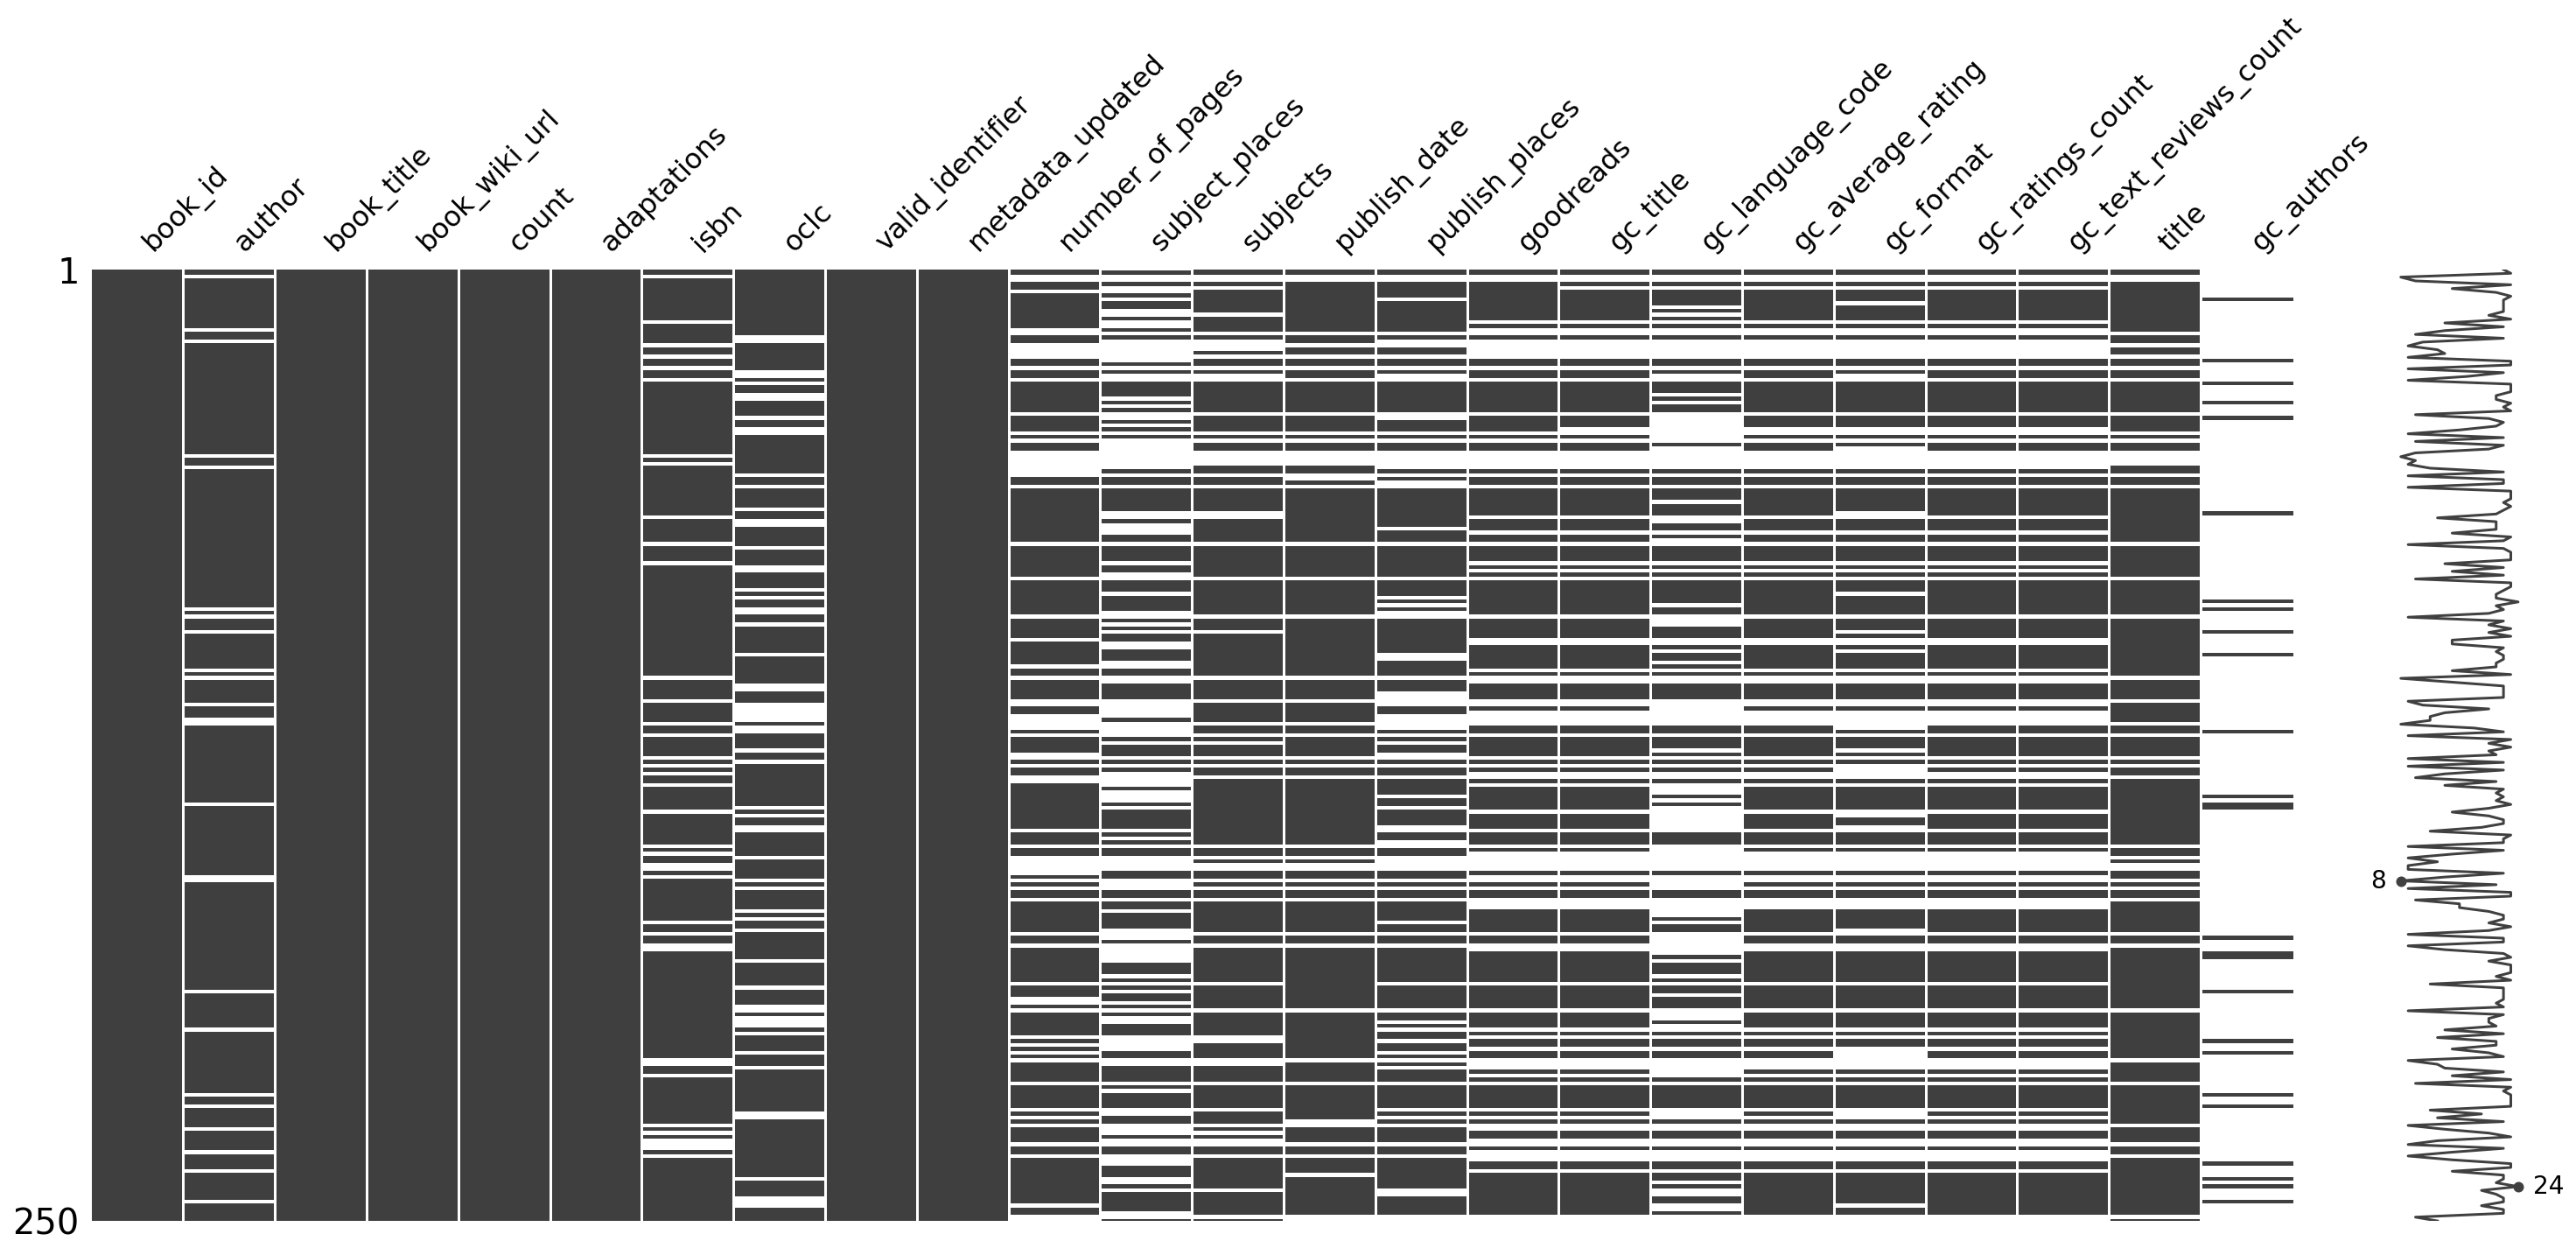

In [211]:
msno.matrix(books.sample(250))

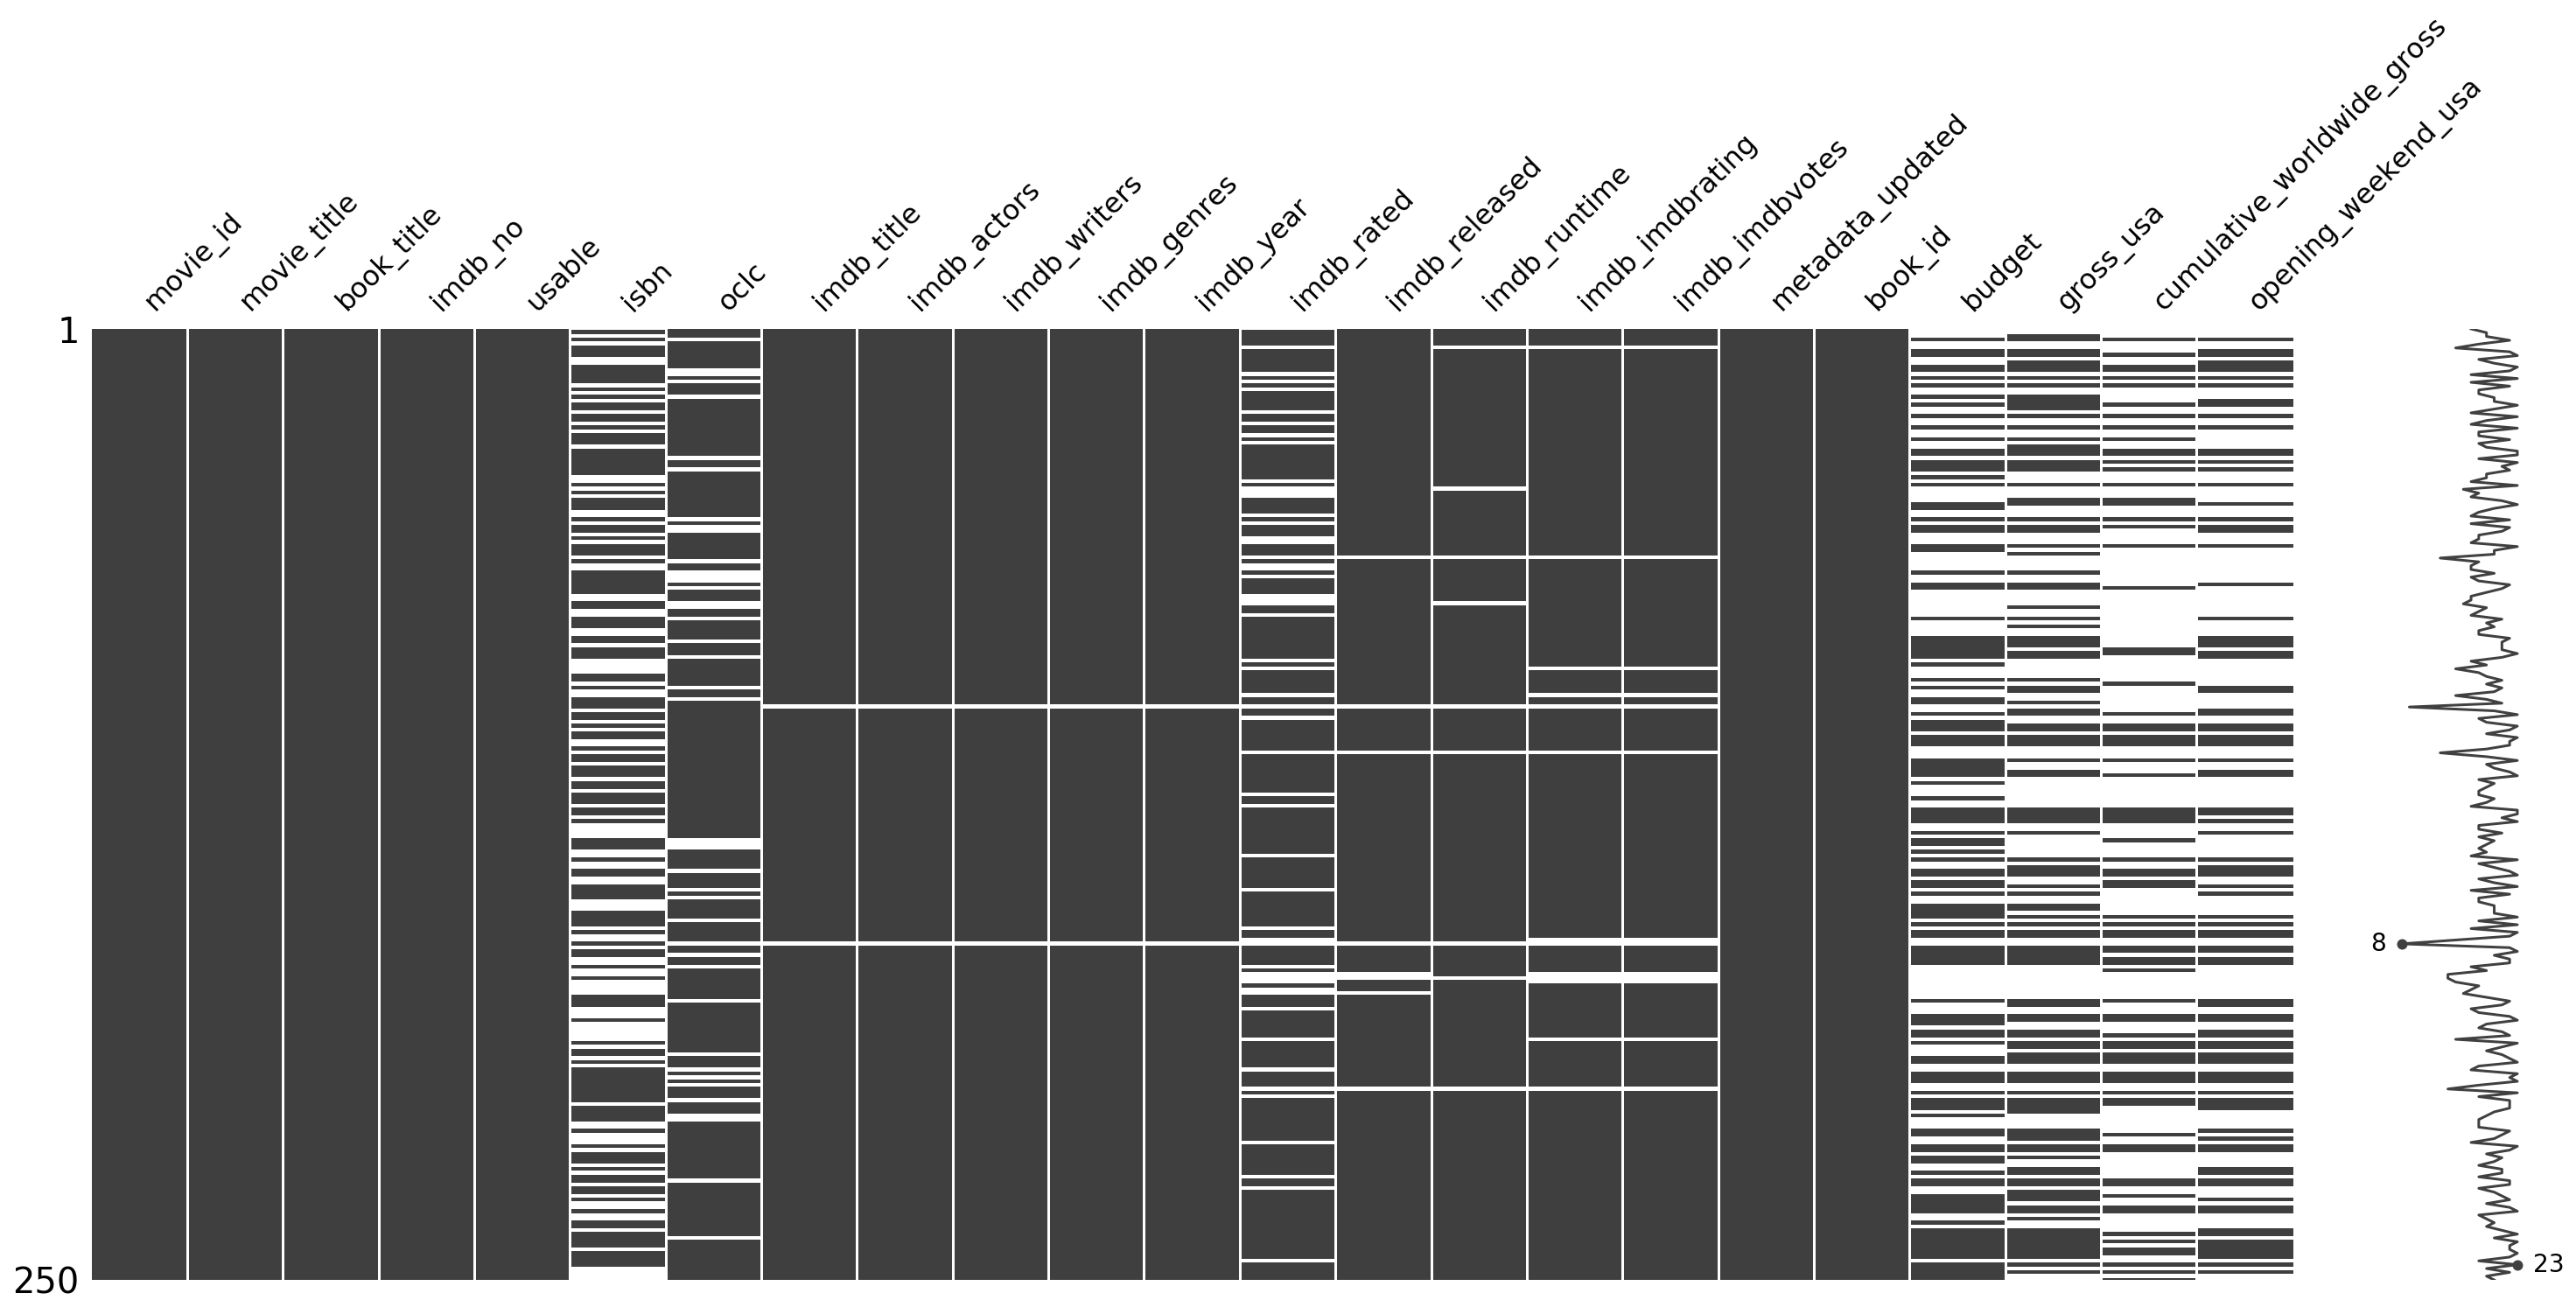

In [212]:
msno.matrix(movies.sample(250))

In [213]:
def get_dtype_summary(df):
    x = pd.DataFrame(df.dtypes, columns=['dtype']).rename_axis('keys')
    y = pd.DataFrame(df.isnull().sum(), columns= ['null_count']).rename_axis('keys')
    z = pd.DataFrame(df.count(), columns = ['non_null_count']).rename_axis('keys')
    x = x.merge(y.merge(z, on = 'keys'), on = 'keys')
    print(x)

In [214]:
get_dtype_summary(books)

                         dtype  null_count  non_null_count
keys                                                      
book_id                 object           0             769
author                  object          63             706
book_title              object           0             769
book_wiki_url           object           1             768
count                    int64           0             769
adaptations             object           0             769
isbn                    object         141             628
oclc                    object         189             580
valid_identifier          bool           0             769
metadata_updated          bool           0             769
number_of_pages        float64         264             505
subject_places          object         434             335
subjects                object         237             532
publish_date            object         195             574
publish_places          object         302             4

In [215]:
get_dtype_summary(movies)

                              dtype  null_count  non_null_count
keys                                                           
movie_id                     object           0             660
movie_title                  object           0             660
book_title                   object           0             660
imdb_no                      object           0             660
usable                         bool           0             660
isbn                        float64         278             382
oclc                         object         138             522
imdb_title                   object           6             654
imdb_actors                  object           6             654
imdb_writers                 object           6             654
imdb_genres                  object           6             654
imdb_year                    object           6             654
imdb_rated                   object         164             496
imdb_released                object     

In [191]:
nan_to_string = ['author', 'isbn', 'oclc', 'title', 'imdb_rated', 'imdb_runtime']

for col_name in nan_to_string:
    try:
        books[col_name][books[col_name].isnull()] = ''
        movies[col_name][movies[col_name].isnull()] = ''
    except KeyError:
        pass

/Users/chan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/chan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Merge rows with same `book_id` and `movie_id`.

In [216]:
sum(books['book_id'].value_counts() > 1), sum(
    movies['movie_id'].value_counts() > 1)

(83, 45)

In [221]:
books['book_id'].value_counts()[:7]
movies['movie_id'].value_counts()[:7]

b_0312355297_                3
b_0060254920_225496          2
b__848975                    2
b__37505041                  2
b__38659585                  2
b_9780307931894_972369283    2
b__7207376                   2
Name: book_id, dtype: int64

m__53071567_tt0857480              14
m__18798256_tt3256204               5
m__9506808_tt0001463                4
m_1557486603_33897078_tt0035942     3
m_3522128001_7460007_tt0088323      3
m__8462789_tt0031385                3
m_0060250488__tt0076054             2
Name: movie_id, dtype: int64

In [225]:
books.loc[books['book_id'] == 'b_9780307931894_972369283']
movies.loc[movies['movie_id'] == 'm__53071567_tt0857480'][:4]

,book_id,author,book_title,book_wiki_url,count,adaptations,isbn,oclc,valid_identifier,metadata_updated,number_of_pages,subject_places,subjects,publish_date,publish_places,goodreads,gc_title,gc_language_code,gc_average_rating,gc_format,gc_ratings_count,gc_text_reviews_count,title,gc_authors
171,b_9780307931894_972369283,david levithan,every day (novel),https://en.wikipedia.org/wiki/every_day_(novel),0,[],9780307931894,972369283,True,True,NaN,NaN,"['interpersonal relations', 'fiction', 'love',...",2012,['new york'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,every day,NaN
172,b_9780307931894_972369283,NaN,every day_(novel),https://en.wikipedia.org/wiki/every day_(novel),1,['every day'],9780307931894,972369283,True,True,NaN,NaN,"['interpersonal relations', 'fiction', 'love',...",2012,['new york'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,every day,NaN


,movie_id,movie_title,book_title,imdb_no,usable,isbn,oclc,imdb_title,imdb_actors,imdb_writers,imdb_genres,imdb_year,imdb_rated,imdb_released,imdb_runtime,imdb_imdbrating,imdb_imdbvotes,metadata_updated,book_id,budget,gross_usa,cumulative_worldwide_gross,opening_weekend_usa
10,m__53071567_tt0857480,adaptations of the picture of dorian gray (1917),the picture of dorian gray,tt0857480,True,NaN,53071567,the picture of dorian gray,"['john bailey', 'raymond barry', 'jeremy brett...",['oscar wilde'],['drama'],1961,NaN,22 jan 1961,60 min,NaN,NaN,True,b__53071567,NaN,NaN,NaN,NaN
11,m__53071567_tt0857480,adaptations of the picture of dorian gray (2001),the picture of dorian gray,tt0857480,True,NaN,53071567,the picture of dorian gray,"['john bailey', 'raymond barry', 'jeremy brett...",['oscar wilde'],['drama'],1961,NaN,22 jan 1961,60 min,NaN,NaN,True,b__53071567,NaN,NaN,NaN,NaN
12,m__53071567_tt0857480,adaptations of the picture of dorian gray (2004),the picture of dorian gray,tt0857480,True,NaN,53071567,the picture of dorian gray,"['john bailey', 'raymond barry', 'jeremy brett...",['oscar wilde'],['drama'],1961,NaN,22 jan 1961,60 min,NaN,NaN,True,b__53071567,NaN,NaN,NaN,NaN
13,m__53071567_tt0857480,adaptations of the picture of dorian gray (1910),the picture of dorian gray,tt0857480,True,NaN,53071567,the picture of dorian gray,"['john bailey', 'raymond barry', 'jeremy brett...",['oscar wilde'],['drama'],1961,NaN,22 jan 1961,60 min,NaN,NaN,True,b__53071567,NaN,NaN,NaN,NaN


Row merge

In [226]:
books = books.groupby(['book_id']).agg('max').reset_index()
movies = movies.groupby(['movie_id']).agg('max').reset_index()

sum(books['book_id'].value_counts() > 1), sum(movies['movie_id'].value_counts() > 1)

(0, 0)

## EDA